<a href="https://colab.research.google.com/github/Malanidhruv/quant-projects/blob/main/NIFTY_AUTO_SECTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
pip install pya3

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pya3 import Aliceblue
from datetime import datetime, timedelta
import holidays


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
!cp "NSE.csv" /content/drive/MyDrive/

In [22]:
!cp "Nifty Auto Historical Data.csv" /content/drive/MyDrive/


In [23]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Nifty Auto Historical Data.csv')
# Load the CSV file into a DataFrame
df1 = pd.read_csv('NSE.csv')

# Display the first few rows of the DataFrame to ensure it was loaded correctly
df.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,09-09-2024,"25,454.40","25,515.65","25,515.65","25,261.20",9.53M,-0.28%
1,06-09-2024,"25,527.15","25,817.65","25,893.15","25,435.90",32.31M,-1.19%
2,05-09-2024,"25,835.30","25,987.70","26,016.95","25,800.25",38.64M,-0.38%
3,04-09-2024,"25,934.25","25,869.40","25,988.55","25,764.20",30.90M,-0.39%
4,03-09-2024,"26,034.65","26,140.85","26,141.75","26,004.15",31.62M,-0.14%


In [24]:
import pandas as pd

# Load the CSV file
file_path = '/content/Nifty Auto Historical Data.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], thousands=',',
                 converters={'Change %': lambda x: float(x.strip('%')) / 100})

# Set 'Date' as the index
df.set_index('Date', inplace=True)


In [25]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
09-09-2024,25454.40,25515.65,25515.65,25261.20,9.53M,-0.0028
06-09-2024,25527.15,25817.65,25893.15,25435.90,32.31M,-0.0119
05-09-2024,25835.30,25987.70,26016.95,25800.25,38.64M,-0.0038
04-09-2024,25934.25,25869.40,25988.55,25764.20,30.90M,-0.0039
03-09-2024,26034.65,26140.85,26141.75,26004.15,31.62M,-0.0014
...,...,...,...,...,...,...
19-07-2011,3720.54,3720.54,3720.54,3720.54,NaN,-0.0103
18-07-2011,3759.19,3759.19,3759.19,3759.19,NaN,-0.0065
15-07-2011,3783.65,3783.65,3783.65,3783.65,NaN,0.0000


In [26]:
print(df.index)
print(type(df.index))


Index(['09-09-2024', '06-09-2024', '05-09-2024', '04-09-2024', '03-09-2024',
       '02-09-2024', '30-08-2024', '29-08-2024', '28-08-2024', '27-08-2024',
       ...
       '26-07-2011', '25-07-2011', '22-07-2011', '21-07-2011', '20-07-2011',
       '19-07-2011', '18-07-2011', '15-07-2011', '14-07-2011', '13-07-2011'],
      dtype='object', name='Date', length=3257)
<class 'pandas.core.indexes.base.Index'>


In [27]:
import pandas as pd

# Load the CSV file
file_path = '/content/Nifty Auto Historical Data.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], thousands=',',
                 converters={'Change %': lambda x: float(x.strip('%')) / 100})

# Convert 'Date' column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Specify format if needed
df.set_index('Date', inplace=True)


In [28]:
print(df.columns)


Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [29]:
import pandas as pd

# Load the CSV file
file_path = '/content/Nifty Auto Historical Data.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], thousands=',',
                 converters={'Change %': lambda x: float(x.strip('%')) / 100})

# Convert 'Date' column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)

# Rename 'Change %' to 'pct'
df.rename(columns={'Change %': 'pct'}, inplace=True)

# Verify column names and data
print(df.columns)
print(df.head())

# Resample data to get monthly percentage change (sum of daily percentage changes in a month)
monthly_pct_change = df['pct'].resample('M').sum()

# Convert the result to a DataFrame for further manipulation
monthly_df = monthly_pct_change.to_frame(name='pct')

# Extract year and month for grouping purposes
monthly_df['year'] = monthly_df.index.year
monthly_df['month'] = monthly_df.index.month

# Calculate the average monthly returns and standard deviation
monthly_avg = monthly_df.groupby('month')['pct'].mean()
monthly_std = monthly_df.groupby('month')['pct'].std()

# Combine into a single DataFrame and sort by 'Average Return'
monthly_stats = pd.DataFrame({
    'Average Return': monthly_avg,
    'Standard Deviation': monthly_std
}).sort_values(by='Average Return', ascending=False)

# Display the result
print(monthly_stats)


Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'pct'], dtype='object')
               Price      Open      High       Low    Vol.     pct
Date                                                              
2024-09-09  25454.40  25515.65  25515.65  25261.20   9.53M -0.0028
2024-09-06  25527.15  25817.65  25893.15  25435.90  32.31M -0.0119
2024-09-05  25835.30  25987.70  26016.95  25800.25  38.64M -0.0038
2024-09-04  25934.25  25869.40  25988.55  25764.20  30.90M -0.0039
2024-09-03  26034.65  26140.85  26141.75  26004.15  31.62M -0.0014
       Average Return  Standard Deviation
month                                    
4            0.049208            0.069151
10           0.036100            0.057941
5            0.026192            0.070330
6            0.017962            0.045783
9            0.016957            0.061514
1            0.012900            0.072861
7            0.012179            0.060049
12           0.010392            0.038237
11           0.009446            0.07263

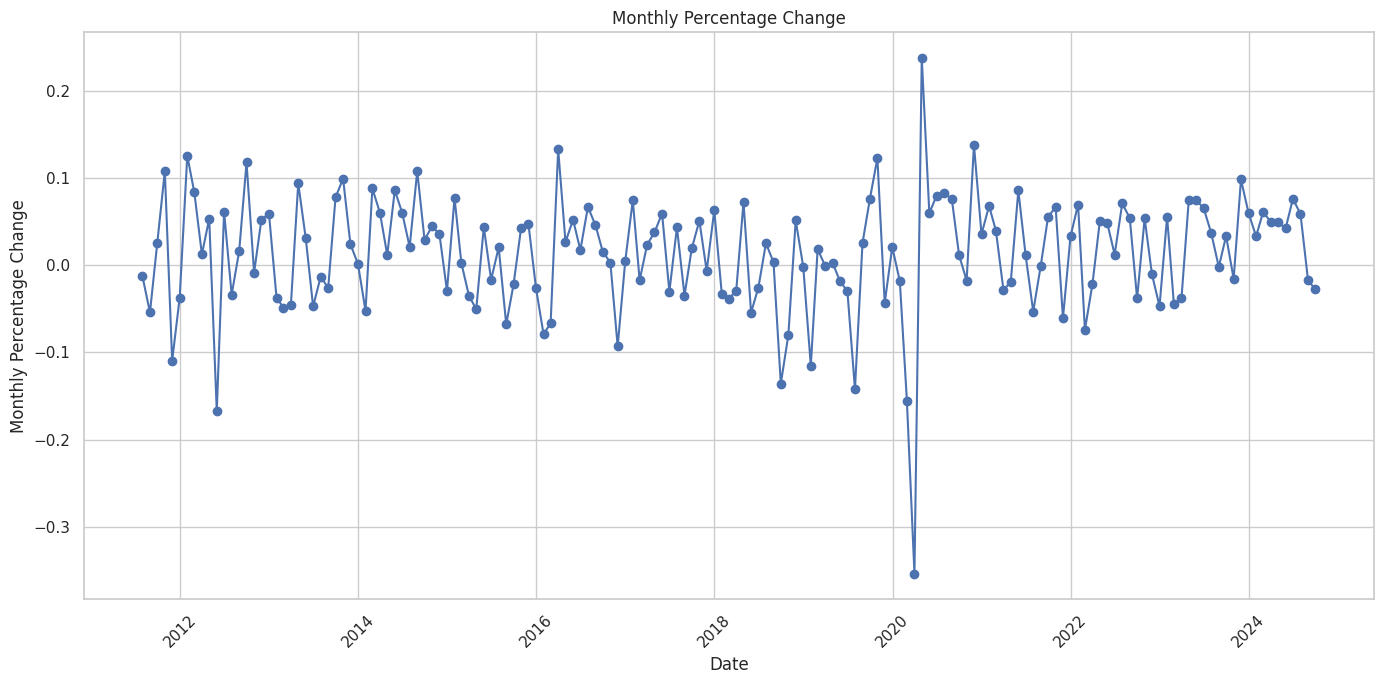

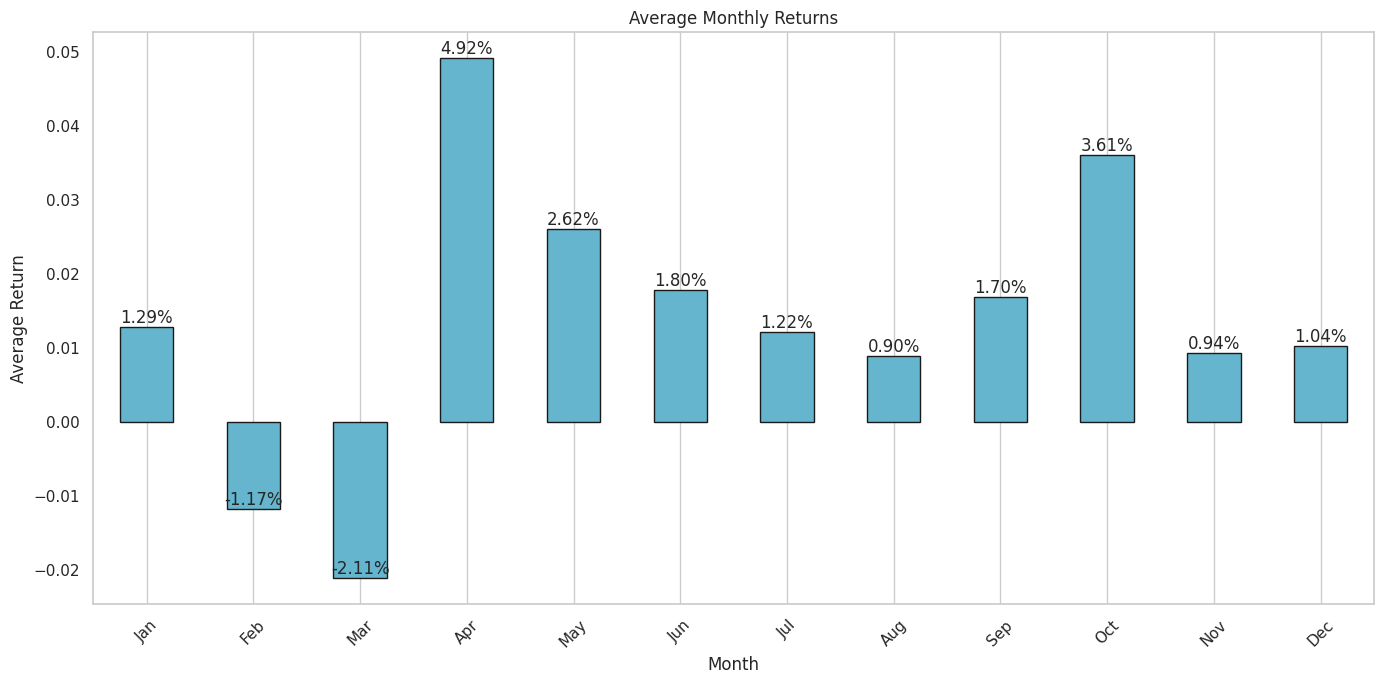

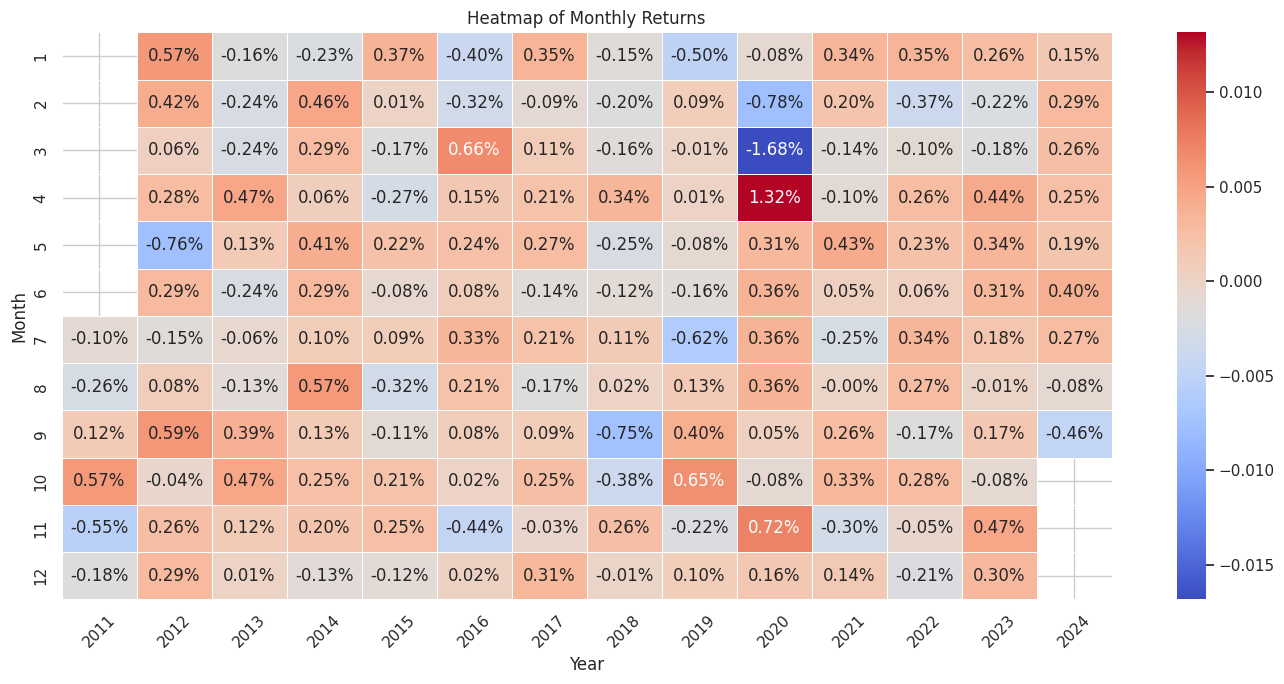

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Line Plot of Monthly Percentage Change
plt.figure(figsize=(14, 7))
plt.plot(monthly_df.index, monthly_df['pct'], marker='o', linestyle='-', color='b')
plt.title('Monthly Percentage Change')
plt.xlabel('Date')
plt.ylabel('Monthly Percentage Change')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Bar Plot of Average Monthly Returns with Annotations
plt.figure(figsize=(14, 7))
bars = monthly_avg.plot(kind='bar', color='c', edgecolor='k')

# Annotate each bar with its value
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:.2%}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center', va='bottom')

plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Average Return')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 3. Heatmap of Monthly Returns
# Resample data to get monthly returns (mean of daily percentage changes)
monthly_returns = df['pct'].resample('M').mean()
monthly_returns = monthly_returns.reset_index()

# Add year and month columns
monthly_returns['Year'] = monthly_returns['Date'].dt.year
monthly_returns['Month'] = monthly_returns['Date'].dt.month

# Pivot table to get a matrix format for the heatmap
heatmap_data = monthly_returns.pivot(index='Month', columns='Year', values='pct')

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2%", linewidths=0.5)
plt.title('Heatmap of Monthly Returns')
plt.xlabel('Year')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
# NIFTY Auto stocks analysis

In [38]:
df1 # NSE tokens from Alice Blue

,Exch,Exchange Segment,Group Name,Symbol,Token,Instrument Type,Instrument Name,Formatted Ins Name,Trading Symbol,Lot Size,Tick Size
0,NSE,nse_cm,EQ,011NSETEST,14747,0,011NSETEST,011NSETEST-EQ,011NSETEST-EQ,1.0,0.05
1,NSE,nse_cm,EQ,GULFOILLUB,4391,0,GULF OIL LUB. IND. LTD.,GULFOILLUB-EQ,GULFOILLUB-EQ,1.0,0.05
2,NSE,nse_cm,EQ,GUJRAFFIA,4548,0,GUJARAT RAFFIA INDUST LTD,GUJRAFFIA-EQ,GUJRAFFIA-EQ,1.0,0.05
3,NSE,nse_cm,EQ,GUJGASLTD,10599,0,GUJARAT GAS LIMITED,GUJGASLTD-EQ,GUJGASLTD-EQ,1.0,0.05
4,NSE,nse_cm,EQ,GUJAPOLLO,14677,0,GUJ. APOLLO IND. LTD.,GUJAPOLLO-EQ,GUJAPOLLO-EQ,1.0,0.05
...,...,...,...,...,...,...,...,...,...,...,...
6467,NSE,nse_idx,NaN,NIFTY SMLCAP 250,26062,INDEX,NaN,NIFTY SMLCAP 250,NaN,NaN,0.05
6468,NSE,nse_idx,NaN,NIFTY MIDSML 400,26063,INDEX,NaN,NIFTY MIDSML 400,NaN,NaN,0.05
6469,NSE,nse_idx,NaN,NIFTY200 QUALTY30,26064,INDEX,NaN,NIFTY200 QUALTY30,NaN,NaN,0.05
6470,NSE,nse_idx,NaN,NIFTY MIDCAP SELECT,26074,INDEX,NaN,NIFTY MIDCAP SELECT,NaN,NaN,0.05


In [44]:
# APRIL MONTH RETURN OF AUTO STOCKS

In [43]:

def get_user_credentials():
    user_id = input("Enter your user ID: ")
    api_key = input("Enter your API key: ")
    return user_id, api_key

def initialize_alice():
    user_id, api_key = get_user_credentials()
    alice = Aliceblue(user_id=user_id, api_key=api_key)
    alice.get_session_id()
    return alice

def analyze_stock(alice, token):
    instrument = alice.get_instrument_by_token('NSE', token)

    from_datetime = datetime(2011, 7, 13)
    to_datetime = datetime(2024, 9, 9)
    interval = "D"

    historical_data = alice.get_historical(instrument, from_datetime, to_datetime, interval)
    df = pd.DataFrame(historical_data)

    # Preprocess data
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
    df.set_index('datetime', inplace=True)
    df['pct'] = df['close'].pct_change()
    df.columns = df.columns.str.strip()
    df = df.drop(columns=['open', 'high', 'low', 'close', 'volume']).dropna()

    # Resample data to get monthly percentage change
    monthly_pct_change = df['pct'].resample('M').sum()
    df = monthly_pct_change.to_frame(name='pct')

    # Extract year and month for analysis
    df['year'] = df.index.year
    df['month'] = df.index.month

    # Calculate average monthly returns and standard deviation
    monthly_avg = df.groupby('month')['pct'].mean()
    monthly_std = df.groupby('month')['pct'].std()

    # Combine into a single DataFrame
    monthly_stats = pd.DataFrame({
        'Average Return': monthly_avg,
        'Standard Deviation': monthly_std
    }).sort_values(by='Average Return', ascending=False)

    return monthly_stats

def print_signals(top_stocks):
    print("\nStocks with April in Top 3 Months of Highest Average Return:")
    for stock_name, top_months, month_names in top_stocks:
        print(f"\n{stock_name}:")
        for month, name in zip(top_months.index, month_names):
            print(f"{name}: {top_months.loc[month, 'Average Return']:.2%}")

def get_stock_name(alice, token):
    instrument = alice.get_instrument_by_token('NSE', token)
    return instrument.name

def save_to_csv(top_stocks, filename="top_stocks.csv"):
    data = []
    for stock_name, top_months, month_names in top_stocks:
        for month, name in zip(top_months.index, month_names):
            data.append({
                'Stock Name': stock_name,
                'Month': name,
                'Average Return': top_months.loc[month, 'Average Return']
            })

    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"\nData saved to {filename}")

def main():
    # Initialize Aliceblue object and get credentials
    alice = initialize_alice()

    # List of tokens to analyze
    tokens = [
        2181, 335, 2031, 2277, 16669, 163, 1348, 4204, 8479, 910, 10999, 422, 212, 676, 3456
    ]

    top_stocks = []

    for token in tokens:
        monthly_stats = analyze_stock(alice, token)

        # Get top three months
        top_months = monthly_stats.head(3)
        month_names = top_months.index.map(lambda x: datetime(1900, x, 1).strftime('%B'))

        if 4 in top_months.index:  # Check if July (7) is one of the top 3 months
            stock_name = get_stock_name(alice, token)
            top_stocks.append((stock_name, top_months, month_names))

    # Print signals
    print_signals(top_stocks)

    # Save results to CSV
    save_to_csv(top_stocks)

if __name__ == "__main__":
    main()


Enter your user ID: 1141826
Enter your API key: AFKdHtRs5n1alf1tID4mk7V8sucnaCk96BD15jn5P93M0opkTULtWuocnEbyRCbRFQQJ42zOnkicITFhTjotG9zEE8YkhkREMlOOvKumWgq6ryASc29FrIjavCrZ2vNJ

Stocks with April in Top 3 Months of Highest Average Return:

BALKRISIND-EQ:
April: 8.10%
July: 5.18%
March: 5.04%

M&M-EQ:
April: 7.42%
May: 7.26%
June: 3.76%

BAJAJ-AUTO-EQ:
October: 4.47%
April: 3.92%
June: 3.44%

APOLLOTYRE-EQ:
April: 6.34%
November: 5.48%
July: 3.63%

HEROMOTOCO-EQ:
May: 5.85%
April: 3.84%
June: 2.46%

MOTHERSON-EQ:
May: 11.12%
April: 10.29%
June: 9.15%

EICHERMOT-EQ:
May: 7.49%
April: 6.38%
September: 5.43%

MARUTI-EQ:
April: 5.01%
October: 4.46%
September: 4.08%

BHARATFORG-EQ:
April: 4.72%
July: 4.72%
August: 3.55%

ASHOKLEY-EQ:
September: 5.84%
October: 5.26%
April: 4.29%

EXIDEIND-EQ:
April: 5.90%
May: 2.87%
December: 2.00%

TATAMOTORS-EQ:
October: 10.97%
January: 7.86%
April: 7.58%

Data saved to top_stocks.csv


In [48]:
# MONTHLY data of average returns

def get_user_credentials():
    user_id = input("Enter your user ID: ")
    api_key = input("Enter your API key: ")
    return user_id, api_key

def initialize_alice():
    user_id, api_key = get_user_credentials()
    alice = Aliceblue(user_id=user_id, api_key=api_key)
    alice.get_session_id()
    return alice

def analyze_stock(alice, token):
    instrument = alice.get_instrument_by_token('NSE', token)

    from_datetime = datetime(2011, 7, 13)
    to_datetime = datetime(2024, 9, 9)
    interval = "D"

    historical_data = alice.get_historical(instrument, from_datetime, to_datetime, interval)
    df = pd.DataFrame(historical_data)

    # Preprocess data
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
    df.set_index('datetime', inplace=True)
    df['pct'] = df['close'].pct_change()
    df.columns = df.columns.str.strip()
    df = df.drop(columns=['open', 'high', 'low', 'close', 'volume']).dropna()

    # Resample data to get monthly percentage change
    monthly_pct_change = df['pct'].resample('M').sum()
    df = monthly_pct_change.to_frame(name='pct')

    # Extract year and month for analysis
    df['year'] = df.index.year
    df['month'] = df.index.month

    # Calculate average monthly returns and standard deviation
    monthly_avg = df.groupby('month')['pct'].mean()
    monthly_std = df.groupby('month')['pct'].std()

    # Combine into a single DataFrame
    monthly_stats = pd.DataFrame({
        'Average Return': monthly_avg,
        'Standard Deviation': monthly_std
    }).sort_values(by='Average Return', ascending=False)

    return monthly_stats

def print_signals(top_stocks):
    print("\nStocks return on monthly basis:")
    for stock_name, top_months, month_names in top_stocks:
        print(f"\n{stock_name}:")
        for month, name in zip(top_months.index, month_names):
            print(f"{name}: {top_months.loc[month, 'Average Return']:.2%}")

def get_stock_name(alice, token):
    instrument = alice.get_instrument_by_token('NSE', token)
    return instrument.name

def save_to_csv(top_stocks, filename="top_stocks.csv"):
    data = []
    for stock_name, top_months, month_names in top_stocks:
        for month, name in zip(top_months.index, month_names):
            data.append({
                'Stock Name': stock_name,
                'Month': name,
                'Average Return': top_months.loc[month, 'Average Return']
            })

    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"\nData saved to {filename}")

def main():
    # Initialize Aliceblue object and get credentials
    alice = initialize_alice()

    # List of tokens to analyze
    tokens = [
        2181, 335, 2031, 2277, 16669, 163, 1348, 4204, 8479, 910, 10999, 422, 212, 676, 3456
    ]

    top_stocks = []

    for token in tokens:
        monthly_stats = analyze_stock(alice, token)

        # Get top three months based on average returns
        top_months = monthly_stats.head(12)
        month_names = top_months.index.map(lambda x: datetime(1900, x, 1).strftime('%B'))

        # Add the stock to the list regardless of specific months
        stock_name = get_stock_name(alice, token)
        top_stocks.append((stock_name, top_months, month_names))

    # Print signals
    print_signals(top_stocks)

    # Save results to CSV
    save_to_csv(top_stocks)

if __name__ == "__main__":
    main()


Enter your user ID: 1141826
Enter your API key: AFKdHtRs5n1alf1tID4mk7V8sucnaCk96BD15jn5P93M0opkTULtWuocnEbyRCbRFQQJ42zOnkicITFhTjotG9zEE8YkhkREMlOOvKumWgq6ryASc29FrIjavCrZ2vNJ

Stocks return on monthly basis:

BOSCHLTD-EQ:
July: 3.38%
May: 3.00%
December: 2.56%
November: 2.39%
June: 2.31%
March: 1.50%
January: 1.10%
February: 0.93%
October: 0.77%
April: 0.08%
August: -1.19%
September: -1.38%

BALKRISIND-EQ:
April: 8.10%
July: 5.18%
March: 5.04%
September: 4.08%
May: 3.44%
October: 2.07%
June: 1.46%
December: 0.78%
November: 0.60%
January: -0.01%
February: -0.05%
August: -1.37%

M&M-EQ:
April: 7.42%
May: 7.26%
June: 3.76%
November: 1.68%
July: 1.65%
August: 1.39%
October: 1.23%
September: 0.53%
January: 0.16%
February: -0.20%
December: -4.44%
March: -4.50%

MRF-EQ:
September: 4.54%
December: 4.46%
November: 4.22%
April: 2.75%
October: 2.65%
July: 2.54%
January: 2.25%
March: 1.86%
May: 1.81%
August: 0.09%
June: -0.79%
February: -0.94%

BAJAJ-AUTO-EQ:
October: 4.47%
April: 3.92%
June: 3.

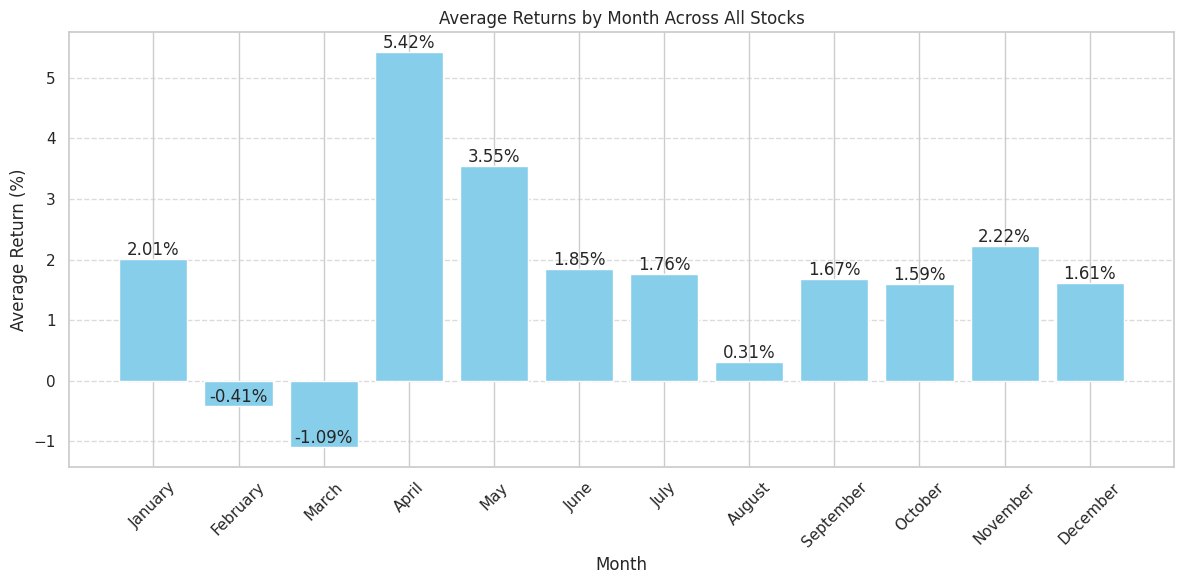

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for each stock's monthly returns
data = {
    'Stock': ['BOSCHLTD-EQ', 'BALKRISIND-EQ', 'M&M-EQ', 'MRF-EQ', 'BAJAJ-AUTO-EQ', 'APOLLOTYRE-EQ',
              'HEROMOTOCO-EQ', 'MOTHERSON-EQ', 'TVSMOTOR-EQ', 'EICHERMOT-EQ', 'MARUTI-EQ',
              'BHARATFORG-EQ', 'ASHOKLEY-EQ', 'EXIDEIND-EQ', 'TATAMOTORS-EQ'],
    'January': [1.10, -0.01, 0.16, 2.25, 2.49, 2.85, -0.61, 6.54, 1.32, -1.61, 2.25, 2.48, 4.27, -1.14, 7.86],
    'February': [0.93, -0.05, -0.20, -0.94, -1.47, 0.55, -4.47, 5.57, -1.29, 0.29, -3.67, 1.57, 0.13, -1.56, -1.58],
    'March': [1.50, 5.18, -4.50, 1.86, -1.90, -1.96, -0.79, -8.71, -3.24, 1.12, 0.47, -3.46, 1.85, 0.96, -4.72],
    'April': [0.08, 8.10, 7.42, 2.75, 3.92, 6.34, 3.84, 10.29, 4.72, 6.38, 5.01, 4.72, 4.29, 5.90, 7.58],
    'May': [3.00, 3.44, 7.26, 1.81, 2.23, 0.18, 5.85, 11.12, 2.07, 7.49, 2.95, 3.01, 3.33, 2.87, -3.42],
    'June': [2.31, 1.46, 3.76, -0.79, 3.44, -2.24, 2.46, 9.15, 4.33, -0.52, 2.64, 0.16, 1.04, 0.30, 0.27],
    'July': [3.38, -0.60, 1.65, 2.54, -0.60, 3.63, 0.56, 8.56, -1.38, 2.54, 1.59, 4.72, -1.75, 1.63, -0.01],
    'August': [-1.19, -1.37, 1.39, 0.09, 2.12, -1.16, 2.11, -1.78, 5.63, -3.41, 0.88, 3.55, -2.01, 0.05, -0.32],
    'September': [-1.38, 4.08, 0.53, 4.54, 2.19, 3.62, 0.35, -4.95, 8.91, 5.43, 4.08, -4.35, 5.84, 1.64, -5.41],
    'October': [0.77, 2.07, 1.23, 2.65, 4.47, 1.10, 1.15, -24.37, 10.27, 1.82, 4.46, 3.49, 5.26, -1.46, 10.97],
    'November': [2.39, 0.60, 1.68, 4.22, 0.54, 5.48, 1.19, 7.70, 0.85, 4.12, -0.58, 1.40, 0.55, 1.43, 1.77],
    'December': [2.56, 0.78, -4.44, 4.46, 0.94, 2.61, 0.64, 5.11, 3.63, 1.54, 1.48, 1.93, -1.35, 2.00, 2.23]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set the month as the index
df = df.set_index('Stock')

# Calculate the average return for each month across all stocks
monthly_avg_returns = df.mean()

# Create a DataFrame for plotting
monthly_avg_returns = monthly_avg_returns.reset_index()
monthly_avg_returns.columns = ['Month', 'Average Return']

# Define the order of months for sequential plotting
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_returns['Month'] = pd.Categorical(monthly_avg_returns['Month'], categories=months_order, ordered=True)
monthly_avg_returns = monthly_avg_returns.sort_values('Month')

# Plot the average returns
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_avg_returns['Month'], monthly_avg_returns['Average Return'], color='skyblue')

# Add the return values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Average Returns by Month Across All Stocks')
plt.xlabel('Month')
plt.ylabel('Average Return (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
